# Минипроект 3

### Описание данных
Данные имеют следующую структуру:
- записываются для каждого пользователя, совершившего покупки, каждый день

- для каждой даты есть своя папка, внутри неё – папки для каждого пользователя

- внутри каждой папки есть файл data.csv, где и хранятся данные

Схематично выглядит так:
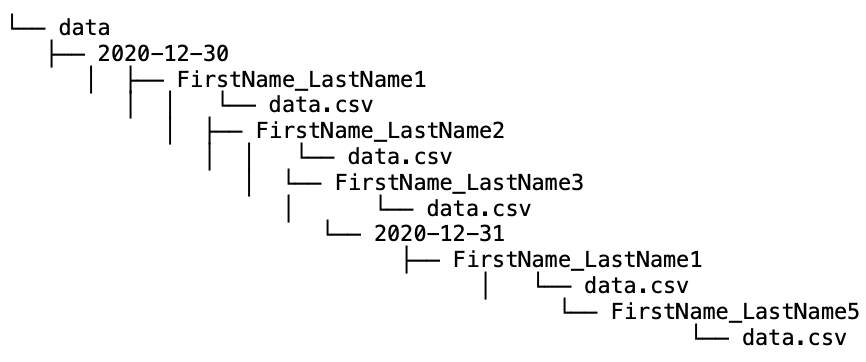

Например, 30 декабря три покупателя сделали покупки, 31 – два (папки 2020-12-30 и 2020-12-31 соответственно). Поскольку клиент FirstName_LastName1 купил товары в оба дня, для него имеется папка в папке для каждой из дат. Для других клиентов – по одной.  
Note: данные в задании покрывают другой временной период, имена тоже другие.

In [121]:
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

### Задание 1
Соберите все данные из папки data в один датафрэйм, имеющий следующие столбцы: колонки из самих файлов (product_id, quantity), а также имя пользователя (name), и дата этих покупок (date, соответствует названию папки, где лежит папка с пользователем)

#### 1 вариант (первоначальный)

In [62]:
first = True # индикатор первой итерации

for i in os.listdir('/Users/ola/Documents/Karpov/4. Работа с грязными данными/data/'):
    if not i.startswith('.'):
        for j in os.listdir('/Users/ola/Documents/Karpov/4. Работа с грязными данными/data/{}'.format(i)):
             if not j.startswith('.'):
                if first: # если первая итерация - создаем датафрейм
                    df = pd.read_csv('/Users/ola/Documents/Karpov/4. Работа с грязными данными/data/{}/{}/data.csv'.format(i, j))
                    df['name'] = j
                    df['date'] = i
                    first = False 
                    
                else: # если последующие итерации - приклеиваем к уже имеющемуся новый датафрейм
                    df_1 = pd.read_csv('/Users/ola/Documents/Karpov/4. Работа с грязными данными/data/{}/{}/data.csv'.format(i, j))
                    df_1['name'] = j
                    df_1['date'] = i
                    df = pd.concat([df, df_1])
df = df.drop(columns = ['Unnamed: 0'])
df

,product_id,quantity,name,date
0,56,4,Vasiliy_Fedorov,2020-12-06
1,97,3,Vasiliy_Fedorov,2020-12-06
2,79,3,Vasiliy_Fedorov,2020-12-06
3,29,5,Vasiliy_Fedorov,2020-12-06
0,73,5,Alexey_Fedorov,2020-12-08
...,...,...,...,...
1,3,4,Kirill_Fedorov,2020-12-04
2,89,5,Kirill_Fedorov,2020-12-04
3,75,2,Kirill_Fedorov,2020-12-04
4,41,5,Kirill_Fedorov,2020-12-04


#### 2 вариант (улучшенный)

In [177]:
# Можно создать пустой датафрейм, улучшаем решение: 

# Создание датафрейма для всех данных
df = pd.DataFrame()

# Чтение данных из папки data и добавление их в основной датафрейм
for i in os.listdir('/Users/ola/Documents/Karpov/4. Работа с грязными данными/data/'):
    if not i.startswith('.'):
        for j in os.listdir('/Users/ola/Documents/Karpov/4. Работа с грязными данными/data/{}'.format(i)):
             if not j.startswith('.'):
                    temp_df = pd.read_csv('/Users/ola/Documents/Karpov/4. Работа с грязными данными/data/{}/{}/data.csv'.format(i, j))
                    temp_df['name'] = j
                    temp_df['date'] = i
                    df = pd.concat([df, temp_df])
                    
# Удалим лишнюю колонку                    
df = df.drop(columns = ['Unnamed: 0'])

# Сделаем стандартную индексацию
df.reset_index(drop = True, inplace = True)
df

,product_id,quantity,name,date
0,56,4,Vasiliy_Fedorov,2020-12-06
1,97,3,Vasiliy_Fedorov,2020-12-06
2,79,3,Vasiliy_Fedorov,2020-12-06
3,29,5,Vasiliy_Fedorov,2020-12-06
4,73,5,Alexey_Fedorov,2020-12-08
...,...,...,...,...
156,3,4,Kirill_Fedorov,2020-12-04
157,89,5,Kirill_Fedorov,2020-12-04
158,75,2,Kirill_Fedorov,2020-12-04
159,41,5,Kirill_Fedorov,2020-12-04


#### 3 вариант (образцовое решение)
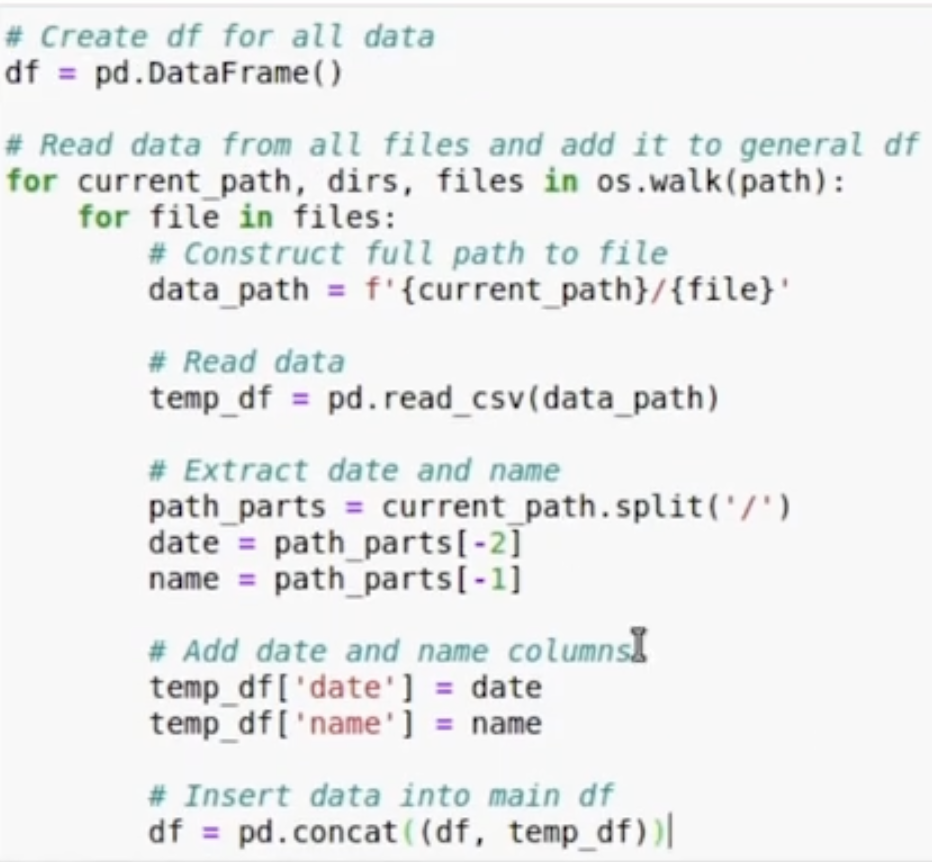

### Задание 2
Выясните, какой пользователь купил больше всего товаров. Если их несколько, то перечислите имена через запятую с пробелом и в алфавитном порядке.

In [76]:
# Найдем количество покупок для каждого пользователя
quantity_user_buy = df.groupby('name', as_index = False).agg({'quantity': 'sum'})
quantity_user_buy

,name,quantity
0,Alexey_Fedorov,24
1,Alexey_Ivanov,17
2,Alexey_Petrov,7
3,Alexey_Smirnov,52
4,Anton_Ivanov,23
5,Anton_Petrov,18
6,Anton_Smirnov,45
7,Kirill_Fedorov,28
8,Kirill_Petrov,9
9,Kirill_Smirnov,17


Найдем максимум покупок среди всех пользователей

In [83]:
quantity_user_buy.max()[1] # найти максимальное значение во второй колонке

52

Выясним, какие пользователи сделали количество покупок, равное максимуму:

In [82]:
quantity_user_buy.query('quantity == 52').sort_values('name')

,name,quantity
3,Alexey_Smirnov,52
13,Petr_Smirnov,52


### Задание 3
Найдите топ-10 товаров по числу проданных единиц за всё время и постройте барплот. Сколько было продано единиц товара с product_id==56?

In [96]:
# Поиск ТОП-10 товаров 
top10_products = df.groupby('product_id', as_index = False)\
    .agg({'quantity': 'sum'})\
    .sort_values('quantity', ascending = False)\
    .head(10)

top10_products

,product_id,quantity
22,27,20
42,56,18
21,24,15
51,74,15
32,41,14
27,34,13
66,94,13
46,66,13
65,92,12
38,50,12


<AxesSubplot:xlabel='product_id', ylabel='quantity'>

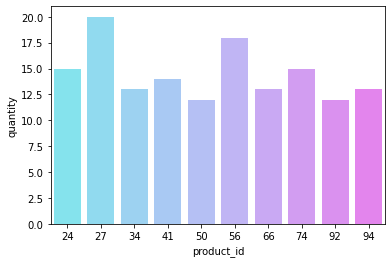

In [116]:
sns.barplot(data = top10_products, x = 'product_id', y = 'quantity', alpha = 0.6, palette = 'cool')

<AxesSubplot:xlabel='product_id', ylabel='quantity'>

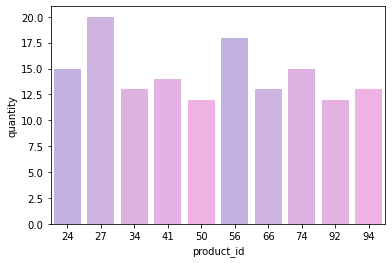

In [114]:
sns.barplot(data = top10_products, x = 'product_id', y = 'quantity', alpha = 0.6, palette = ['#9370db', '#B379db', '#D370db', '#E370db', '#F370db'])

In [117]:
# Узнаем, сколько единиц товара с product_id == 56 было продано 
top10_products.query('product_id == 56')

,product_id,quantity
42,56,18


### Задание 4
Визуализируйте продажи по дням

In [119]:
quantity_for_days = df.groupby('date', as_index = False)\
    .agg({'quantity': 'sum'})

<AxesSubplot:xlabel='date', ylabel='quantity'>

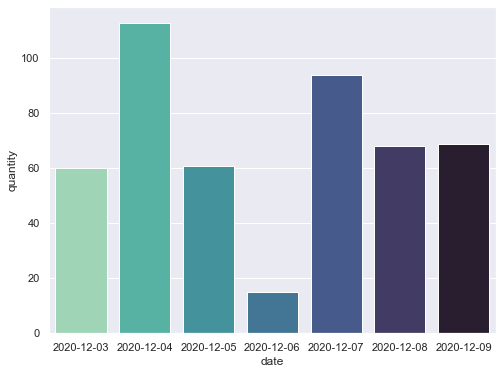

In [155]:
plt.figure(figsize=(8, 6))
sns.barplot(data = quantity_for_days, x = 'date', y = 'quantity', palette = 'mako_r')

Максимальное число товаров было продано 4 декабря

### Задание 5
Сколько пользователей приобрели какой-либо товар повторно (более 1 раза)? Повтором будем считать покупку товара с одинаковым product_id, совершенную в разные дни. 

In [176]:
df.groupby(['name', 'product_id'])\
    .agg({'date': 'nunique'})\
    .query('date > 1')

,,date
name,product_id,
Anton_Ivanov,15,2
Petr_Fedorov,94,2


3 пользователя приобрели товар повторно